# Exploratory Analysis Phishing_Email.csv Group 3

In [32]:
# Potentionally helpful libraries:
# pandas, matplotlib, seaborn, nltk, scikit-learn, gensim, pyLDAvis

import pandas as pd
import re

In [33]:
# Reading in the data
df_phish = pd.read_csv("Phishing_Email.csv")
# Dropping the unecessary index row
df_phish = df_phish.drop(df_phish.columns[0], axis=1)
#checking that it read in correctly
df_phish[0:10]

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,global risk management operations sally congra...,Safe Email
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,re : coastal deal - with exxon participation u...,Safe Email


In [34]:
# Pulling out a few Emails as examples
for i in range(2):
    print("\n\nBEGIN NEW EMAIL:")
    print(df_phish.loc[i+22,"Email Text"])






BEGIN NEW EMAIL:

Question?Do you want a different job?
Do you want to be your own boss?
Do you need extra income?
Do you need to start a new life?
Does your current job seem to go nowhere?If you answered yes to these questions, then here is your solution.We are a fortune 500 company looking for motivated individuals who are 
looking
to a substantial income working from home.Thousands of individual are currently do this RIGHT NOW.
So if you are looking to be employed at home, with a career that will
provide you vast opportunities and a substantial income, please fill
out our online information request form here now:http://ter.netblah.com:27000To miss out on this opportunity, click herehttp://ter.netblah.com:27000/remove.html



BEGIN NEW EMAIL:
URL: http://www.livejournal.com/talkread.bml?journal=jwz&itemid=63309
Date: Not suppliedhttp://www.livejournal.com/talkread.bml?journal=jwz&itemid=63309



## Cleaning The Data and Checking the Balance

In [35]:
#Credit goes to Ken for this one, merged this from the work he did in basic_data_cleaning.ipynb

#Get email counts and datatype
email_counts = df_phish['Email Type'].value_counts()
print(email_counts)

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


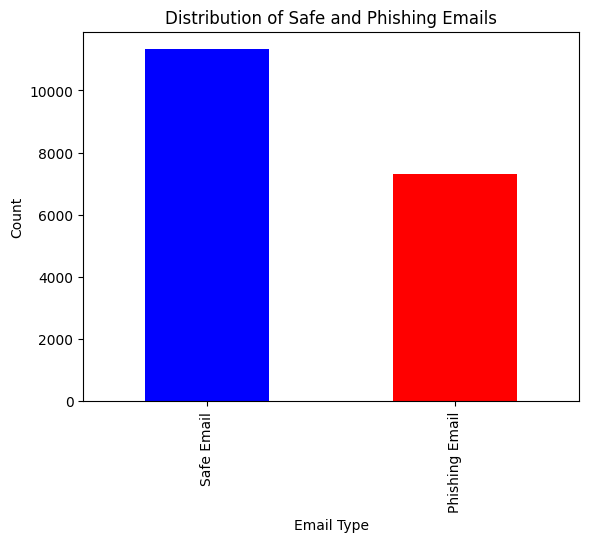

In [36]:
#plot for distribution of "Phishing Email" and "Safe Email"
import matplotlib.pyplot as plot

email_counts.plot(kind='bar', color=['blue','red'])
plot.title('Distribution of Safe and Phishing Emails')
plot.xlabel('Email Type')
plot.ylabel('Count')
plot.show()

In [37]:
#Get count of 'empty' emails
df_original = df_phish
empty_email_count = df_original['Email Text'].str.lower().eq('empty').sum()
print(f"Number of 'empty' emails: {empty_email_count}")

Number of 'empty' emails: 533


In [38]:
#Remove those 'empty' emails from the dataframe
df_phish = df_original[df_original['Email Text'].str.lower() != 'empty']
df_phish

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,Safe Email
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email


## Feature Extraction

### Emails with "re:"

In [39]:
# Adding "Is_Response" feature
df_phish["Is_Response"] = None
# Looping over the DataFrame
for i in range(df_phish.shape[0]):
    hasRE = re.search('''re :''', str(df_phish.iloc[i]["Email Text"]))
    if hasRE:
        df_phish.at[i, "Is_Response"] = True
    else:
        df_phish.at[i, "Is_Response"] = False

C:\Users\danie\AppData\Local\Temp\ipykernel_8720\1284168901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phish["Is_Response"] = None
C:\Users\danie\AppData\Local\Temp\ipykernel_8720\1284168901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phish.at[i, "Is_Response"] = False


In [40]:
df_phish["Is_Response"].value_counts(normalize=True)

Is_Response
False    0.866755
True     0.133245
Name: proportion, dtype: float64

### Emails with links

In [41]:
# Adding "Has_WebLink" and "WebLink" column
df_phish["Has_WebLink"] = None
df_phish["WebLink"] = None
# Patterns to search for hyperlinks, This may need updating to include more patterns
patterns = [r'https?://\S+', r'www\.\S+']

# Looping over the DataFrame
for i in range(df_phish.shape[0]):
    has_link = False
    link = None
    # Looping over each pattern
    for pattern in patterns:
        match = re.search(pattern, str(df_phish.iloc[i]["Email Text"]))
        if match:
            has_link = True
            # write something here to record the link
            link = match.group()
            break  # Break the loop if any pattern is found
    # Update the "Has_WebLink" column based on whether a link is found
    df_phish.at[i, "Has_WebLink"] = has_link
    df_phish.at[i, "WebLink"] = link
    

In [42]:
df_phish["Has_WebLink"].value_counts(normalize=True)

Has_WebLink
False    0.77575
True     0.22425
Name: proportion, dtype: float64

### Email Length

In [43]:
# Creating the Email Length Column
df_phish["Email_Length"] = None
for i in range(df_phish.shape[0]):
    df_phish.at[i, "Email_Length"] = len(str(df_phish.iloc[i]["Email Text"]))
    
# Verifying it worked
df_phish["Email_Length"].tail(10)

18419    3
18452    3
18493    3
18519    3
18533    3
18577    3
18607    3
18626    3
18637    3
18643    3
Name: Email_Length, dtype: object